In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [461]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [463]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

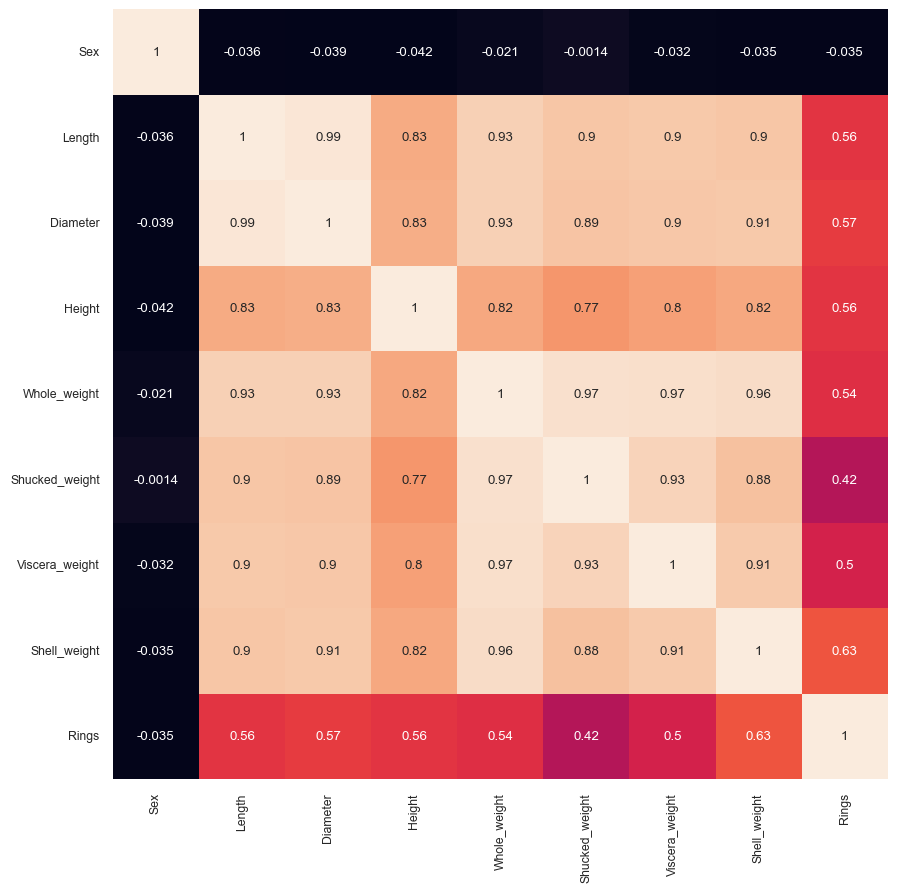

In [465]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [466]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [469]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [471]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [473]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [475]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [477]:
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_191 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [479]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 89.4124 - mse: 89.4124 - val_loss: 22.5963 - val_mse: 22.5963
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.3829 - mse: 18.3829 - val_loss: 7.0300 - val_mse: 7.0300
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6413 - mse: 7.6413 - val_loss: 5.4936 - val_mse: 5.4936
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.2954 - mse: 10.2954 - val_loss: 5.0382 - val_mse: 5.0382
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2939 - mse: 7.2939 - val_loss: 4.7967 - val_mse: 4.7967
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6373 - mse: 5.6373 - val_loss: 4.7890 - val_mse: 4.7890
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6831 - mse: 5.6831 - val_loss: 4.5360 - val_mse: 4.5360
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9443 - mse: 4.9443 - val_loss: 4.4458 - val_mse: 4.4458
Epoch 9/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.11

In [480]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 4.81
R² Score: 0.56


In [481]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

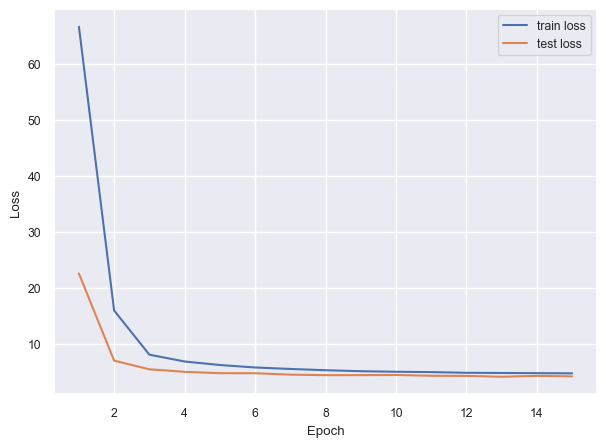

In [482]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##  성능 개선
### Dense Layer 추가

## Dense 64

In [485]:
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

In [486]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 69.1080 - mse: 69.1080 - val_loss: 11.3910 - val_mse: 11.3910
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.9766 - mse: 9.9766 - val_loss: 6.0522 - val_mse: 6.0522
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9246 - mse: 6.9246 - val_loss: 5.3752 - val_mse: 5.3752
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7795 - mse: 5.7795 - val_loss: 5.0447 - val_mse: 5.0447
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.8258 - mse: 5.8258 - val_loss: 4.5861 - val_mse: 4.5861
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3267 - mse: 5.3267 - val_loss: 4.5866 - val_mse: 4.5866
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3449 - mse: 5.3449 - val_loss: 4.3443 - val_mse: 4.3443
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5799 - mse: 4.5799 - val_loss: 4.2238 - val_mse: 4.2238
Epoch 9/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5

In [487]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 4.77
R² Score: 0.56


In [488]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

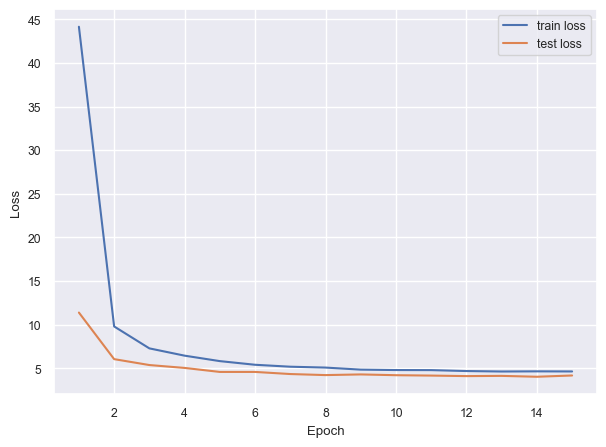

In [489]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Dense 128

In [491]:
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 61.5478 - mse: 61.5478 - val_loss: 8.5897 - val_mse: 8.5897
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2630 - mse: 9.2630 - val_loss: 5.1728 - val_mse: 5.1728
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1254 - mse: 6.1254 - val_loss: 4.9080 - val_mse: 4.9080
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5212 - mse: 5.5212 - val_loss: 4.8604 - val_mse: 4.8604
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1467 - mse: 5.1467 - val_loss: 4.4000 - val_mse: 4.4000
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2335 - mse: 5.2335 - val_loss: 4.2269 - val_mse: 4.2269
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2206 - mse: 5.2206 - val_loss: 4.1871 - val_mse: 4.1871
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7351 - mse: 4.7351 - val_loss: 4.2473 - val_mse: 4.2473
Epoch 9/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7636 -

In [492]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 4.60
R² Score: 0.57


In [493]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

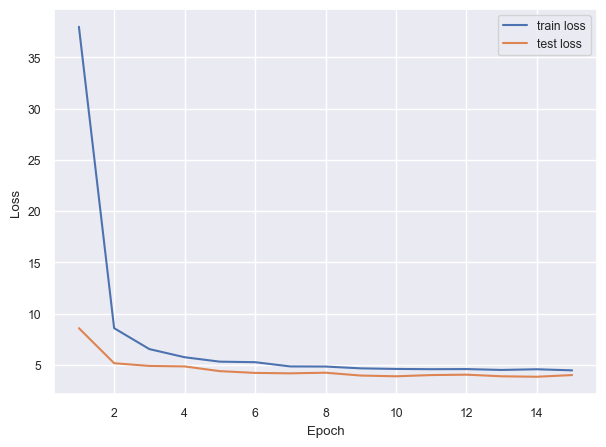

In [494]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Dropout 추가

In [496]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # 첫 번째 드롭아웃 레이어
    Dense(64, activation='relu'),
    Dropout(0.2),  # 두 번째 드롭아웃 레이어
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 68.8028 - mse: 68.8028 - val_loss: 9.1743 - val_mse: 9.1743
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 11.9378 - mse: 11.9378 - val_loss: 5.3133 - val_mse: 5.3133
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9227 - mse: 7.9227 - val_loss: 4.9329 - val_mse: 4.9329
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8727 - mse: 6.8727 - val_loss: 5.0969 - val_mse: 5.0969
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8904 - mse: 6.8904 - val_loss: 4.7390 - val_mse: 4.7390
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.1891 - mse: 7.1891 - val_loss: 4.3738 - val_mse: 4.3738
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.2683 - mse: 7.2683 - val_loss: 4.6320 - val_mse: 4.6320
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3865 - mse: 6.3865 - val_loss: 4.3164 - val_mse: 4.3164
Epoch 9/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6

In [497]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 4.73
R² Score: 0.56


In [498]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

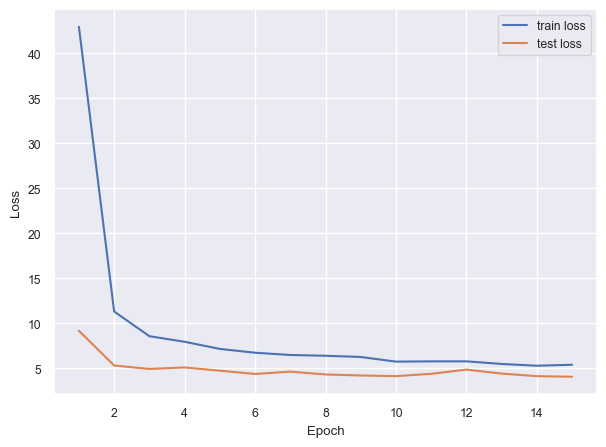

In [499]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 특성 공학
### 상호작용 특성 추가

In [501]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [502]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [503]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [504]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Input(shape=(11,)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # 첫 번째 드롭아웃 레이어
    Dense(64, activation='relu'),
    Dropout(0.2),  # 두 번째 드롭아웃 레이어
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_210" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 8)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)
  • training=True
  • mask=None

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습률 조정 (Dense 128 추 및 Droptout) - 0.001 -> 0.0005

In [ ]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

X = df.drop('Rings', axis=1)
y = df['Rings']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Input(shape=(8,)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # 첫 번째 드롭아웃 레이어
    Dense(64, activation='relu'),
    Dropout(0.2),  # 두 번째 드롭아웃 레이어
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()